<a href="https://colab.research.google.com/github/maulidahiim/markonah/blob/main/project%20iim_of_Python_GenAI_SDK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google AI Study Jam Road to DevFest Surabaya 2025
*Prepared by Joan Santoso (GDE AI and Google Cloud) and Esther Irawati Setiawan (GDE AI and Google Cloud)*

*Part of GDG Surabaya and Artificial Intelligence and Machine Learning Surabaya Workshop Activity*

This cell uses the `!pip install` command to install the `google-genai` library. This library provides the tools to interact with Google's Generative AI models, like Gemini.

In [2]:
!pip install google-genai

This cell imports necessary modules from the `google.genai` library. It imports `genai` for general access to the API and `types` which might be used for defining specific data structures or request types when interacting with the API.

In [15]:
from google import genai
from google.genai import types

This cell sets up the client to interact with the Gemini API.
- It imports `genai` again (this might be redundant if already imported in the previous cell).
- It imports `userdata` from `google.colab` to securely access your API key stored in Colab's Secrets Manager.
- `client = genai.Client(api_key=userdata.get("GOOGLE_API_KEY"))` creates a client instance, authenticating with your API key. This client is then used to make calls to the Gemini API.

In [5]:
from google import genai
from google.colab import userdata
# Only run this block for Gemini Developer API
client = genai.Client(api_key=userdata.get("GEMINI_API"))

This cell demonstrates how to use the client to generate text content.
- `response = client.models.generate_content(...)` makes a call to the `generate_content` method of the `models` object within the client.
- `model="gemini-2.5-flash"` specifies which model to use for the generation.
- `contents="Explain how AI works in a few words"` provides the prompt for the model.
- `print(response.text)` prints the generated text response from the model.

In [7]:
response = client.models.generate_content(
    model="gemini-2.5-flash", contents="Explain how AI works in a few paper"
)
print(response.text)

Okay, let's break down how Artificial Intelligence (AI) works, starting from its fundamental principles and moving towards modern complexities, in a way that would roughly span a few pages.

---

## How AI Works: A Journey from Data to Intelligence

Artificial Intelligence (AI) has rapidly transformed from science fiction into a pervasive technology influencing everything from our smartphones to scientific research. At its core, AI isn't magic; it's a sophisticated branch of computer science focused on enabling machines to **simulate intelligent behavior**. This typically involves learning from data, recognizing patterns, making decisions, or performing tasks that usually require human intelligence.

### Page 1: The Foundational Concepts – What is AI and How Does it Learn?

**1. Defining AI: The Quest for Machine Intelligence**

AI encompasses a broad range of technologies, but its overarching goal is to create systems that can reason, learn, perceive, understand language, and even cre

This cell shows how to upload a file and use its content with the Gemini API, specifically for summarization in this case.
- `from google.colab import files` imports the necessary module to handle file uploads in Colab.
- `uploaded = files.upload()` opens a file picker to allow you to upload a file. It returns a dictionary of the uploaded files.
- `file_name = list(uploaded.keys())[0]` extracts the name of the first uploaded file from the dictionary.
- `file = client.files.upload(file=file_name)` uploads the selected file to the Gemini API's file storage. This makes the file accessible to the models.
- `response = client.models.generate_content(...)` makes another call to generate content.
- `model='gemini-2.0-flash-001'` specifies a different model.
- `contents=['Could you summarize this file?', file]` provides the prompt which includes both a text instruction and the uploaded file as context.
- `print(response.text)` prints the summarized content generated by the model.

In [20]:
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
file = client.files.upload(file=file_name)
response = client.models.generate_content(
    model='gemini-2.5-pro-preview-03-25',
    contents=['Could you summarize this file?', file]
)
print(response.text)

Saving WIN_20250929_10_29_13_Pro.jpg to WIN_20250929_10_29_13_Pro.jpg
Based on the image provided, here is a summary:

This is a casual, wide-angle selfie of three young men in an indoor setting with plain walls.

*   **In the center foreground,** a young man with curly, reddish-brown hair and black-framed glasses is smiling broadly, showing his teeth, and making a "rock on" or "I love you" hand gesture.
*   **To the left and slightly behind him,** another young man with dark curly hair and glasses is wearing a dark blue polo shirt. He is also smiling and making a hand gesture.
*   **To the right,** a third young man with dark hair, wearing a light green polo shirt, leans into the frame, looking at the camera and pointing his index finger up.

The overall tone of the photo is friendly, informal, and playful, suggesting a moment of fun between friends.


#System Instructions and Other Configs
The output of the model can be influenced by several optional settings available in generate_content’s config parameter. For example, increasing max_output_tokens is essential for longer model responses. To make a model more deterministic, lowering the temperature parameter reduces randomness, with values near 0 minimizing variability. Capabilities and parameter defaults for each model is shown in the Vertex AI docs and Gemini API docs respectively.



In [16]:
response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='high',
    config=types.GenerateContentConfig(
        system_instruction='I say high, you say low',
        max_output_tokens=3,
        temperature=0.3,
    ),
)
print(response.text)

low



#Typed Config
All API methods support Pydantic types for parameters as well as dictionaries. You can get the type from google.genai.types.

This cell demonstrates using Pydantic types for configuring `generate_content`.
- It imports `types` from `google.genai`.
- `contents=types.Part.from_text(text='Why is the sky blue?')` shows how to use `types.Part.from_text` to define the input content.
- `config=types.GenerateContentConfig(...)` shows how to use `types.GenerateContentConfig` to set various parameters like `temperature`, `top_p`, `top_k`, `candidate_count`, `seed`, `max_output_tokens`, `stop_sequences`, `presence_penalty`, and `frequency_penalty`.

In [ ]:
from google.genai import types

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents=types.Part.from_text(text='Why is the sky blue?'),
    config=types.GenerateContentConfig(
        temperature=0,
        top_p=0.95,
        top_k=20,
        candidate_count=1,
        seed=5,
        max_output_tokens=100,
        stop_sequences=['STOP!'],
        presence_penalty=0.0,
        frequency_penalty=0.0,
    ),
)

print(response.text)

The sky is blue due to a phenomenon called **Rayleigh scattering**. Here's a breakdown:

*   **Sunlight and Colors:** Sunlight is actually made up of all the colors of the rainbow.

*   **Entering the Atmosphere:** When sunlight enters the Earth's atmosphere, it collides with tiny air molecules (mostly nitrogen and oxygen).

*   **Scattering:** This collision causes the sunlight to scatter in different directions.

*   **Rayleigh Scattering and Wavelength


#List base model

This cell lists the available base models using the Gemini API client.
- `for model in client.models.list():` iterates through the list of models returned by `client.models.list()`.
- `print(model)` prints the details of each available model, including its name, display name, description, version, and supported actions.

In [17]:
for model in client.models.list():
    print(model)

name='models/embedding-gecko-001' display_name='Embedding Gecko' description='Obtain a distributed representation of a text.' version='001' endpoints=None labels=None tuned_model_info=TunedModelInfo() input_token_limit=1024 output_token_limit=1 supported_actions=['embedText', 'countTextTokens'] default_checkpoint_id=None checkpoints=None
name='models/gemini-2.5-pro-preview-03-25' display_name='Gemini 2.5 Pro Preview 03-25' description='Gemini 2.5 Pro Preview 03-25' version='2.5-preview-03-25' endpoints=None labels=None tuned_model_info=TunedModelInfo() input_token_limit=1048576 output_token_limit=65536 supported_actions=['generateContent', 'countTokens', 'createCachedContent', 'batchGenerateContent'] default_checkpoint_id=None checkpoints=None
name='models/gemini-2.5-flash-preview-05-20' display_name='Gemini 2.5 Flash Preview 05-20' description='Preview release (April 17th, 2025) of Gemini 2.5 Flash' version='2.5-preview-05-20' endpoints=None labels=None tuned_model_info=TunedModelInfo

#Safety Settings


This cell demonstrates how to use safety settings to control the model's output.
- It imports `types` from `google.genai`.
- `config=types.GenerateContentConfig(safety_settings=[...])` shows how to pass a list of `types.SafetySetting` objects to the `config` parameter.
- `types.SafetySetting(category='HARM_CATEGORY_HATE_SPEECH', threshold='BLOCK_ONLY_HIGH')` sets a safety threshold for the 'HARM_CATEGORY_HATE_SPEECH' category to 'BLOCK_ONLY_HIGH', meaning only responses with a high probability of being hate speech will be blocked.

In [21]:
from google.genai import types

response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='Say something bad.',
    config=types.GenerateContentConfig(
        safety_settings=[
            types.SafetySetting(
                category='HARM_CATEGORY_HATE_SPEECH',
                threshold='BLOCK_ONLY_HIGH',
            )
        ]
    ),
)
print(response.text)

I am programmed to be a harmless AI assistant. I cannot generate content that is harmful, unethical, or offensive.



#Function Calling
Automatic Python function Support:

You can pass a Python function directly and it will be automatically called and responded.

This cell demonstrates the function calling capability of the Gemini API.
- `def get_current_weather(location: str) -> str:` defines a Python function that the model can call.
- `config=types.GenerateContentConfig(tools=[get_current_weather],)` shows how to pass a list of functions as tools to the `config` parameter. When the model determines that a function call is necessary to fulfill the prompt, it will generate a function call rather than a text response.

In [ ]:
from google.genai import types

def get_current_weather(location: str) -> str:
    """Returns the current weather.

    Args:
      location: The city and state, e.g. San Francisco, CA
    """
    return 'sunny'


response = client.models.generate_content(
    model='gemini-2.0-flash-001',
    contents='What is the weather like in Boston?',
    config=types.GenerateContentConfig(
        tools=[get_current_weather],
    ),
)

print(response.text)

The weather in Boston is sunny.



#Generate Content (Synchronous Streaming)
Generate content in a streaming format so that the model outputs streams back to you, rather than being returned as one chunk.

This cell demonstrates synchronous streaming for generating text content.
- `for chunk in client.models.generate_content_stream(...)` uses `generate_content_stream` to receive the model's response in chunks as it is generated.
- `print(chunk.text, end='')` prints each chunk of text as it is received, without adding a newline at the end, resulting in the text being printed continuously.

In [22]:
for chunk in client.models.generate_content_stream(
    model='gemini-2.0-flash-001', contents='Tell me a story in 300 words.'
):
    print(chunk.text, end='')

The lighthouse keeper, Silas, was a man of routine. Every night for thirty years, he'd lit the lamp, its beam a steadfast finger pointing away from the treacherous reefs. But this night, the fog was thicker than pea soup, muffling the roar of the waves to an eerie hush.

He climbed the spiral stairs, his joints creaking in protest, and reached the lamp room. As he flicked the switch, nothing happened. Panic constricted his chest. He tried again, and again, but the lamp remained stubbornly dark.

Downstairs, he wrestled with the generator, its engine sputtering and dying. He was no mechanic, and the instructions were hieroglyphics to his weary eyes. Outside, the fog swirled, pressing against the glass panes like hungry ghosts.

He grabbed his oilskins and a flashlight. He had to warn any approaching ships. He stumbled out onto the lantern gallery, the wind ripping at him. He swung the flashlight frantically, its beam swallowed by the fog.

Then, a low, mournful horn echoed through the m

#Streaming for image content


This cell demonstrates synchronous streaming for generating content from an image.
- It imports `types` and `files` from `google.genai` and `google.colab` respectively.
- `uploaded = files.upload()` allows the user to upload a file from their local machine.
- `types.Part.from_bytes(data=uploaded[file_name], mime_type=YOUR_IMAGE_MIME_TYPE)` creates a part from the bytes of the uploaded image file.
- The code then uses `generate_content_stream` to get a description of the image chunk by chunk.

In [23]:
from google.genai import types
from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]

YOUR_IMAGE_MIME_TYPE = 'image/png' # Make sure this matches the uploaded file type

for chunk in client.models.generate_content_stream(
    model='gemini-2.0-flash-001',
    contents=[
        'What is this image about?',
        types.Part.from_bytes(data=uploaded[file_name], mime_type=YOUR_IMAGE_MIME_TYPE), # Use the bytes from the uploaded dictionary
    ],
):
    print(chunk.text, end='')

Saving WIN_20250930_08_24_37_Pro.jpg to WIN_20250930_08_24_37_Pro.jpg
The image appears to be a selfie of three young people, likely students, making silly faces. Two of them are sticking their tongues out, and the one on the right is making a pose with her hand. Another person is visible in the background.

#Generate images using Imagen
Imagen is Google's high-fidelity image generation model, capable of generating realistic and high quality images from text prompts. All generated images include a SynthID watermark.


- `response = client.models.generate_images(...)` calls the `generate_images` method, specifying the `imagen-4.0-generate-001` model.
- `prompt='Robot holding a red skateboard'` provides the text prompt for image generation.
- `config=types.GenerateImagesConfig(number_of_images= 4,)` sets the configuration to generate 4 images.
- The loop `for generated_image in response.generated_images:` iterates through the generated images, and `generated_image.image.show()` displays each image.

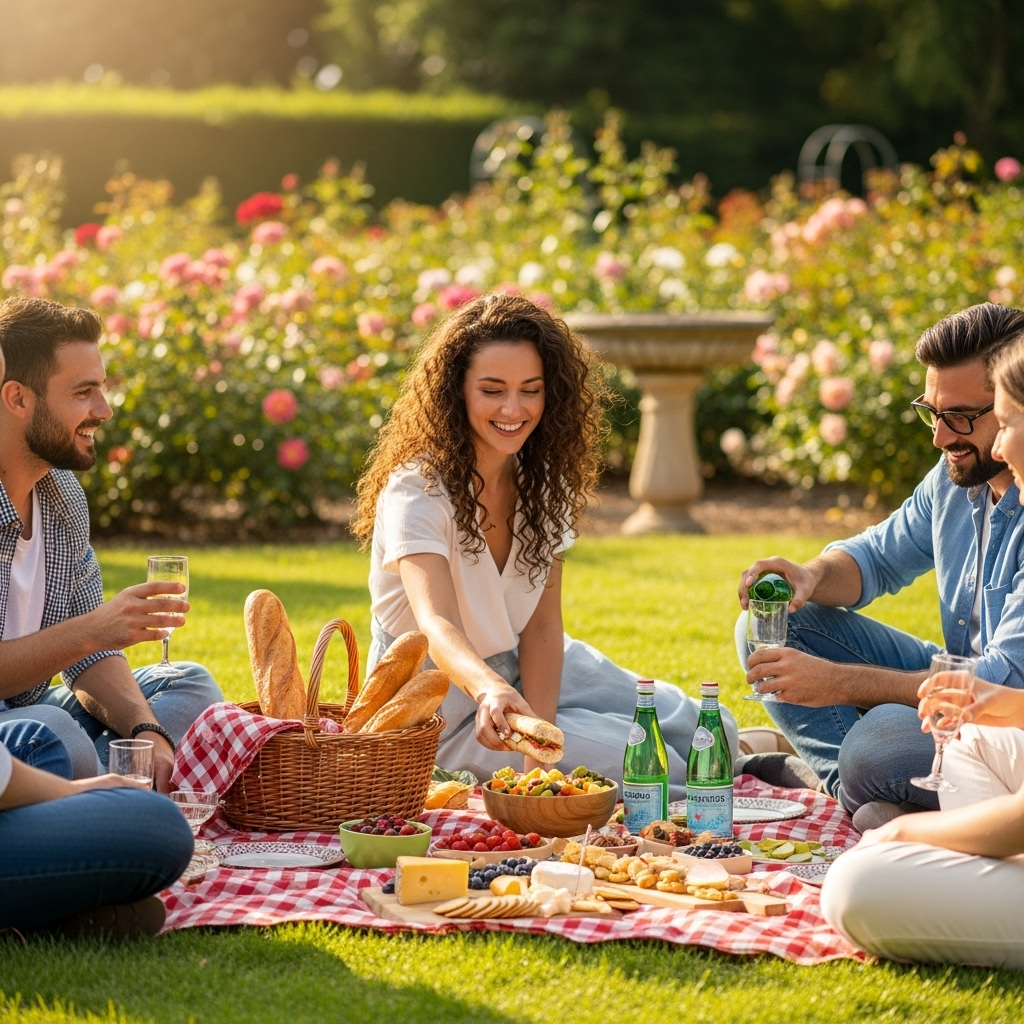

In [26]:
response = client.models.generate_images(
    model='imagen-4.0-generate-001',
    prompt='people have a picnic in a garden',
    config=types.GenerateImagesConfig(
        number_of_images= 1,
    )
)
for generated_image in response.generated_images:
  generated_image.image.show()

#Generate videos with Veo 3 in Gemini API
Veo 3 is Google's state-of-the-art model for generating high-fidelity, 8-second 720p or 1080p videos from a text prompt, featuring stunning realism and natively generated audio. You can access this model programmatically using the Gemini API. Veo 3 excels at a wide range of visual and cinematic styles. To learn more about the available Veo model variants, see the Model Versions section.


- `prompt = """..."""` defines the text prompt for the video.
- `operation = client.models.generate_videos(model="veo-3.0-generate-001", prompt=prompt,)` calls the `generate_videos` method with the specified model and prompt, which returns an operation object for a long-running process.
- The `while not operation.done:` loop polls the operation status until the video generation is complete.
- `client.files.download(file=generated_video.video)` downloads the generated video file.
- `generated_video.video.save("dialogue_example.mp4")` saves the video to a local file.

In [27]:
import time
prompt = """A close up of two people staring at a cryptic drawing on a wall, torchlight flickering.
A man murmurs, 'This must be it. That's the secret code.' The woman looks at him and whispering excitedly, 'What did you find?'"""

operation = client.models.generate_videos(
    model="veo-3.0-generate-001",
    prompt=prompt,
)

# Poll the operation status until the video is ready.
while not operation.done:
    print("Waiting for video generation to complete...")
    time.sleep(10)
    operation = client.operations.get(operation)

# Download the generated video.
generated_video = operation.response.generated_videos[0]
client.files.download(file=generated_video.video)
generated_video.video.save("dialogue_example.mp4")
print("Generated video saved to dialogue_example.mp4")

Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Generated video saved to dialogue_example.mp4


#Generating videos from images
The following code demonstrates generating an image using Imagen, then using that image as the starting frame for generating video with Veo 3.

- First, an image is generated using the Imagen model with a given prompt.
- Then, `operation = client.models.generate_videos(model="veo-3.0-generate-001", prompt=prompt, image=imagen.generated_images[0].image,)` calls `generate_videos` again, but this time passing the previously generated image as the starting point for the video.
- Similar to the previous cell, the code polls the operation status and saves the generated video.

In [32]:
prompt = "Panning wide shot of a calico yasmin sleeping in the sunshine"

# Step 1: Generate an image with Imagen.
imagen = client.models.generate_images(
    model="imagen-4.0-generate-001",
    prompt=prompt,
)

# Step 2: Generate video with Veo 3 using the image.
operation = client.models.generate_videos(
    model="veo-3.0-generate-001",
    prompt=prompt,
    image=imagen.generated_images[0].image,
)

# Poll the operation status until the video is ready.
while not operation.done:
    print("Waiting for video generation to complete...")
    time.sleep(10)
    operation = client.operations.get(operation)

# Download the video.
video = operation.response.generated_videos[0]
client.files.download(file=video.video)
video.video.save("veo3_with_image_input.mp4")
print("Generated video saved to veo3_with_image_input.mp4")

Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Waiting for video generation to complete...
Generated video saved to veo3_with_image_input.mp4


Further Reading :


1.   [Gemini API Docs](https://ai.google.dev/gemini-api/docs)
2.   [Github for Google GenAI SDK](https://github.com/googleapis/python-genai)

